<span style="color:#04c921; font-size:24px; font-weight:700"> Linear Regression</span>

In this practice, we will use linear regression to do some analysis with the framingham data set to see if we can find any meaningful relationships between blood pressure, age, and gender.

The numeric difference between your systolic and diastolic blood pressure is called your pulse pressure. For example, if your resting blood pressure is 120/80, your pulse pressure is 40. For adults older than age 60, a pulse pressure greater than 60 can be a useful predictor of heart attacks or other cardiovascular disease; this is especially true for men. The most important cause of elevated pulse pressure is stiffness of the aorta, the largest artery in the body. The greater your pulse pressure, the stiffer and more damaged the vessels are thought to be.
([Reference](http://www.mayoclinic.org/diseases-conditions/high-blood-pressure/expert-answers/pulse-pressure/faq-20058189))

#### Read the data

Load the framingham dataset in directory '/datasets/framingham/'.

In [1]:
framingham_data <- read.csv("/dsa/data/all_datasets/framingham/framingham.csv")

Let's add a new column for the pulse pressure named "pulseP" and compute it from sysBP and diaBP.

In [2]:
framingham_data["pulseP"] <- framingham_data$sysBP - framingham_data$diaBP
head(framingham_data)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,pulseP
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
1,1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0,36.0
2,0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0,40.0
3,1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0,47.5
4,0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1,55.0
5,0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0,46.0
6,0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0,70.0


<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 1:</span> For this analysis, we'll need adults (age>18) who are not taking blood pressure medication (BPMeds==0), and we will create two subsets; one for males and one for females, and pick only the columns we'll work on (age, sysBP, diaBP, BMI, heartRate, pulseP).

In [3]:
framingham_data_male   <- subset(framingham_data, male==1 & age > 18 & BPMeds == 0, select=c(2,11:14,17))
framingham_data_female <- subset(framingham_data, male==0 & age > 18 & BPMeds == 0, select=c(2,11:14,17))
head(framingham_data_male)

,age,sysBP,diaBP,BMI,heartRate,pulseP
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,39,106.0,70,26.97,80,36.0
3,48,127.5,80,25.34,75,47.5
9,52,141.5,89,26.36,76,52.5
10,43,162.0,107,23.61,93,55.0
13,46,142.0,94,26.31,98,48.0
17,48,138.0,90,22.37,64,48.0


Now, let's see if we can model the relation between age and pulse pressure for males vs. females.

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 2:</span>   Fit a linear regression model where age is the independent variable, and pulse pressure is the dependent variable. 

In [4]:
# find the model for males
age_pp_male <- lm(framingham_data_male$pulseP ~ framingham_data_male$age)
summary(age_pp_male)

# find the model for females
age_pp_female <- lm(framingham_data_female$pulseP ~ framingham_data_female$age)
summary(age_pp_female)


Call:
lm(formula = framingham_data_male$pulseP ~ framingham_data_male$age)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.615  -7.922  -1.096   5.645  80.348 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              24.65521    1.63754   15.06   <2e-16 ***
framingham_data_male$age  0.46149    0.03279   14.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.77 on 1768 degrees of freedom
Multiple R-squared:  0.1008,	Adjusted R-squared:  0.1003 
F-statistic: 198.1 on 1 and 1768 DF,  p-value: < 2.2e-16



Call:
lm(formula = framingham_data_female$pulseP ~ framingham_data_female$age)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.172  -8.840  -1.313   6.302  97.828 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 8.43158    1.64611   5.122 3.27e-07 ***
framingham_data_female$age  0.83969    0.03281  25.595  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.34 on 2291 degrees of freedom
Multiple R-squared:  0.2224,	Adjusted R-squared:  0.222 
F-statistic: 655.1 on 1 and 2291 DF,  p-value: < 2.2e-16


The $R^2$ values are 0.10 and 0.22 which suggests age alone is not a good predictor of pulse pressure in neither males nor females. Look out for the caveats here: first, we are trying to fit a **linear** model; the actual relationship could be a nonlinear one; and second, there might be different types of relationships in separated age brackets (such as before 50, after 50, etc.) that is hard to model with one linear model. 

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 3:</span>  Let's do the same for BMI and pulse pressure variables.  Fit a linear regression model where BMI is independent and pulse pressure is the dependent variable. 

In [5]:
# find the model for males
bmi_pp_male <- lm(framingham_data_male$pulseP ~ framingham_data_male$BMI)
summary(bmi_pp_male)

# find the model for females
bmi_pp_female <- lm(framingham_data_female$pulseP ~ framingham_data_female$BMI)
summary(bmi_pp_female)


Call:
lm(formula = framingham_data_male$pulseP ~ framingham_data_male$BMI)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.503  -8.290  -1.776   5.795  66.295 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              41.88152    2.24952  18.618   <2e-16 ***
framingham_data_male$BMI  0.20806    0.08525   2.441   0.0148 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.21 on 1763 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.003367,	Adjusted R-squared:  0.002802 
F-statistic: 5.956 on 1 and 1763 DF,  p-value: 0.01476



Call:
lm(formula = framingham_data_female$pulseP ~ framingham_data_female$BMI)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.146  -9.661  -2.563   6.542  98.728 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                28.46779    1.79427   15.87   <2e-16 ***
framingham_data_female$BMI  0.84505    0.06961   12.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.64 on 2278 degrees of freedom
  (13 observations deleted due to missingness)
Multiple R-squared:  0.06076,	Adjusted R-squared:  0.06035 
F-statistic: 147.4 on 1 and 2278 DF,  p-value: < 2.2e-16


Again, $R^2$ values are too low to suggest a good model based on BMI.

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 4:</span>  Let's create two subsets from male data; first one is for those younger than 50, second one is for those older than 50. We want to see if the relation between heart rate and pulse pressure is different for older males vs. younger males.


In [6]:
framingham_data_male_younger <- subset(framingham_data_male, age <= 49)
framingham_data_male_older   <- subset(framingham_data_male, age >=50)

# now fit a linear model to both data sets; use pulse pressure as independent variable and find the model for heart rate.
hr_pp_male_young <- lm(framingham_data_male_younger$heartRate ~ framingham_data_male_younger$pulseP)
summary(hr_pp_male_young)

hr_pp_male_older <- lm(framingham_data_male_older$heartRate ~ framingham_data_male_older$pulseP)
summary(hr_pp_male_older)


Call:
lm(formula = framingham_data_male_younger$heartRate ~ framingham_data_male_younger$pulseP)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.523  -7.790  -0.709   6.967  43.589 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         66.33081    1.68645  39.332  < 2e-16 ***
framingham_data_male_younger$pulseP  0.18618    0.03717   5.009 6.51e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.49 on 953 degrees of freedom
Multiple R-squared:  0.02565,	Adjusted R-squared:  0.02463 
F-statistic: 25.09 on 1 and 953 DF,  p-value: 6.512e-07



Call:
lm(formula = framingham_data_male_older$heartRate ~ framingham_data_male_older$pulseP)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.014  -8.244  -1.107   6.893  45.956 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       68.42197    1.55950  43.874  < 2e-16 ***
framingham_data_male_older$pulseP  0.10411    0.02955   3.524  0.00045 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.63 on 812 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01506,	Adjusted R-squared:  0.01385 
F-statistic: 12.42 on 1 and 812 DF,  p-value: 0.0004496


Again, we do not see a meaningful linear model for heart rate given pulse pressure for young and old people. Let's look at the relationship between systolic and diastolic blood pressures. 

The dynamic relationship between diastolic and systolic blood pressure expressed by the **ambulatory arterial stiffness index (AASI)** has been introduced as a measure of arterial function.
[AASI = 1 - (regression slope of diastolic-versus-systolic)] 
The available evidence suggests that AASI can predict future cardiovascular events, particularly stroke, and is associated with indices of arterial function. ([Reference](https://www.ncbi.nlm.nih.gov/pubmed/22632918))

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 5:</span>  Now, we want to compute the AASI for males older than 50 vs. females older than 50. For this, we first create the female subset, then compute the slopes of diastolic vs. systolic linear regression model for both sets, and finally compute the AASI for both sets. 

In [7]:
framingham_data_female_older <- subset(framingham_data_female, age >= 50)
# Now compute the linear models for framingham_data_female_older and framingham_data_male_older; 
# Use systolic pressure as independent variable

In [8]:
# find the model for older males
slope_male_older <- lm(framingham_data_male_older$diaBP ~ framingham_data_male_older$sysBP)
summary(slope_male_older)

# find the model for older females
slope_female_older <- lm(framingham_data_female_older$diaBP ~ framingham_data_female_older$sysBP)
summary(slope_female_older)


Call:
lm(formula = framingham_data_male_older$diaBP ~ framingham_data_male_older$sysBP)

Residuals:
     Min       1Q   Median       3Q      Max 
-30.8500  -4.2440   0.4302   4.6599  19.9811 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      22.91216    1.66537   13.76   <2e-16 ***
framingham_data_male_older$sysBP  0.45270    0.01218   37.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.444 on 813 degrees of freedom
Multiple R-squared:  0.6296,	Adjusted R-squared:  0.6291 
F-statistic:  1382 on 1 and 813 DF,  p-value: < 2.2e-16



Call:
lm(formula = framingham_data_female_older$diaBP ~ framingham_data_female_older$sysBP)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.921  -4.555   0.281   5.049  32.395 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        30.90535    1.45119   21.30   <2e-16 ***
framingham_data_female_older$sysBP  0.38350    0.01011   37.92   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.9 on 1077 degrees of freedom
Multiple R-squared:  0.5717,	Adjusted R-squared:  0.5713 
F-statistic:  1438 on 1 and 1077 DF,  p-value: < 2.2e-16


The $R^2$ values suggest that there is a somewhat linear relationship between systolic and diastolic blood pressures for both genders. Let's look at the coefficients of the models.

In [9]:
# First column gives the intercept and the slope of the model.

coef(summary(slope_male_older))
slope_mo <- coef(summary(slope_male_older))[2,1]

coef(summary(slope_female_older))
slope_fo <- coef(summary(slope_female_older))[2,1]


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),22.9121566,1.66537139,13.75799,7.174791e-39
framingham_data_male_older$sysBP,0.4526954,0.01217872,37.17101,1.702213e-177


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),30.9053492,1.45119182,21.29653,2.869842e-84
framingham_data_female_older$sysBP,0.3834992,0.01011456,37.91556,1.597496e-200


In [10]:
# Now, given slopes for both models, compute the corresponding AASI values

AASI_male_older = 1 - slope_mo
AASI_female_older = 1 - slope_fo

In [11]:
print(AASI_male_older)
print(AASI_female_older)

[1] 0.5473046
[1] 0.6165008


The AASI for older females is slightly higher than the AASI for older males in this data set. Keep in mind that this is an approximation; the real AASI is measured for individuals by observing their blood pressure in a 24h interval. However, the almost linear relationship between systolic and diastolic blood pressure is indeed medically relevant; it is not just a fluke of this dataset. 

`geom_smooth()` using formula 'y ~ x'



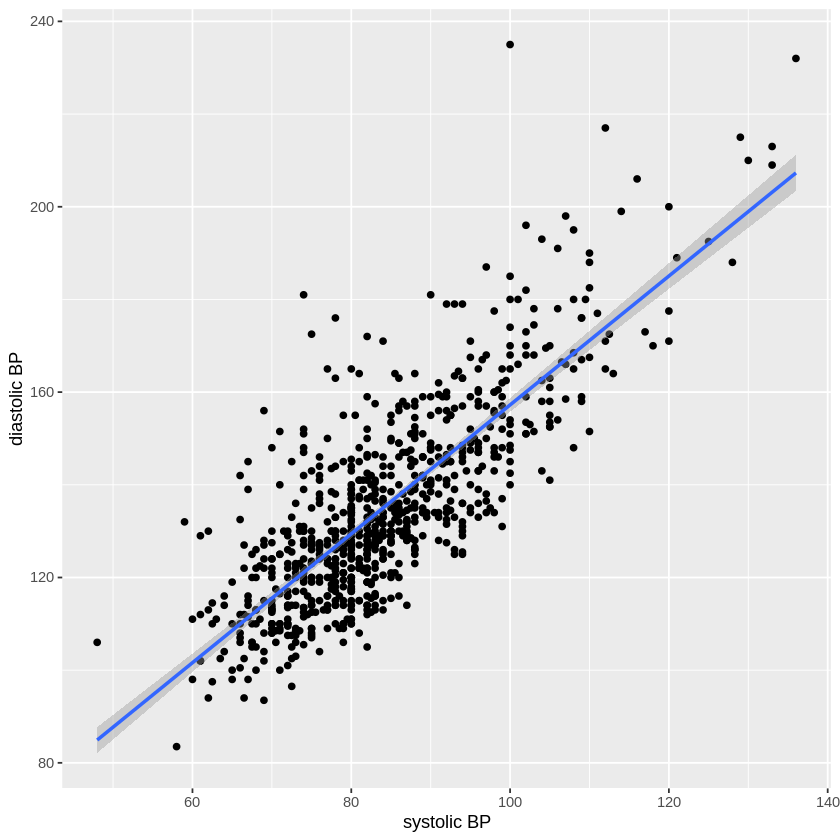

In [12]:
# Let's plot the model for males
library(ggplot2)
p = ggplot(framingham_data_male_older, aes(x=diaBP, y=sysBP)) +
    geom_point() +  
    geom_smooth(method=lm,level = 0.95)   # Add linear regression line, by default includes 95% confidence region
p+xlab('systolic BP')+ylab('diastolic BP')

`geom_smooth()` using formula 'y ~ x'



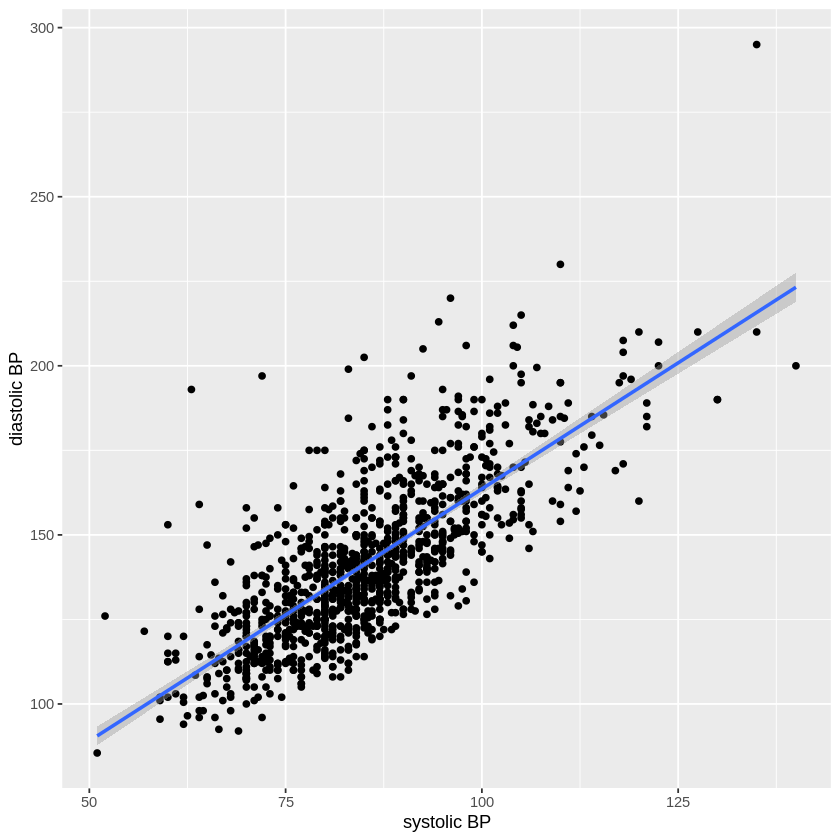

In [13]:
# and for females
p = ggplot(framingham_data_female_older, aes(x=diaBP, y=sysBP)) +
    geom_point() +  
    geom_smooth(method=lm,level = 0.95)   # Add linear regression line, by default includes 95% confidence region
p+xlab('systolic BP')+ylab('diastolic BP')

# Save your notebook!